In [2]:
import numpy as np
from tqdm import tqdm

import cv2 as cv

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from skimage.feature import local_binary_pattern

# settings for LBP
radius = 3
n_points = 8 * radius

def feature_extractor(inp):
  c = np.copy(inp[0]).transpose(1,2,0)
  gray_image = np.uint8(cv.cvtColor(c, cv.COLOR_BGR2GRAY))
  lbp = local_binary_pattern(gray_image, n_points, radius)

  return lbp.ravel()

In [5]:
from dataloader import create_dataloaders

dir = "datasets/ears/images-cropped"

test = dir+"/test"
train = dir+"/train"

train_loader, val_loader, test_loader, num_classes = create_dataloaders(train, test, 8)

In [6]:


def featurize_and_labelrize(loader, l=0):
  labels_ar = []
  features_ar = []

  if(l == 0):
    l = len(test_loader)

  for b, labels in tqdm(iter(loader.dataset), total=l):
    # print( labels, b)
    labels_ar.append(labels)
    feat_in = b.unsqueeze(dim=0).numpy()
    # print(feat_in)
    features_ar.append(feature_extractor(feat_in))
    if(len(features_ar) > l):
      break
  
  return labels_ar, features_ar

labels_ar, features_ar = featurize_and_labelrize(test_loader, 40)

  0%|          | 0/40 [00:00<?, ?it/s]

100%|██████████| 40/40 [00:02<00:00, 17.23it/s]


In [7]:
from sklearn.metrics import pairwise

def calculate_accuracy(features, labels):
    similarity_matrix = pairwise.cosine_distances(features)
    np.fill_diagonal(similarity_matrix, np.inf)
    predicted = labels[np.argmin(similarity_matrix, axis=0)]

    return np.mean(predicted == labels), np.sum(predicted == labels), similarity_matrix

mean score: 0.024390243902439025
 predicted: 1/41


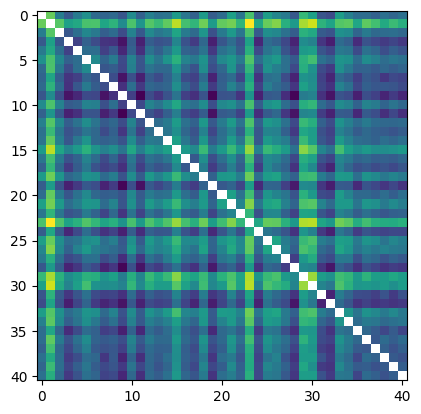

In [8]:
f = np.array(features_ar).reshape(len(features_ar), -1)
l = np.array(labels_ar)
mmean, msum, matrix = calculate_accuracy(features=f, labels=l)

import matplotlib.pyplot as plt

print(f"mean score: {mmean}\n predicted: {msum}/{len(features_ar)}")
plt.imshow(matrix)